### Run pipeline by Jupyter Notebook

In [1]:
import prepocessing as pp
import utils
import fs_n_training as ft
import pandas as pd
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1. Get data set

In [2]:
# Loading dataset
X_ori,y_ori = pp.processing(True)

# 1. Set Spliting
X_train, X_test, y_train, y_test = train_test_split(
        X_ori, y_ori, test_size=0.2, random_state=42)

X_test_new, X_dev, y_test_new, y_dev = train_test_split(
        X_test, y_test, test_size=0.5, random_state=42)

X_test = X_test_new
y_test = y_test_new

print(len(X_train),len(X_test),len(X_dev))

Cached dataset found ! Using existing cached data...
1780 222 223


2. One-Shot Train-Dev-Test Evaluation

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score

In [4]:
""" 

Logistics Regression Test

"""
print("{:*^70}".format("<One-shot test on Softmax Regression>"))
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg_clf = Pipeline([
        ("min_max_scaler", MinMaxScaler()),
        ("selector",SelectKBest(chi2,k=500)),
        ("softmax_reg", softmax_reg),
        ])    
softmax_reg_clf.fit(X_train, y_train)

print("{:-^70}".format("<TRAINING>"),'\n')
# checking underfitting or not
print('Training Fitting Score:\t\t{:.2%}'.format(accuracy_score(softmax_reg_clf.predict(X_train),y_train)))


print("{:-^70}".format("<VALIDATION>"),'\n')
# checking overfitting or not
y_dev_pred_reg = softmax_reg_clf.predict(X_dev)
print('Validation Score:\t\t{:.2%}'.format(accuracy_score(softmax_reg_clf.predict(X_dev),y_dev)))

print("{:-^70}".format("<TEST>"),'\n')
# evaluation on test set
y_test_pred_reg = softmax_reg_clf.predict(X_test)
print(classification_report(y_test,y_test_pred_reg))

****************<One-shot test on Softmax Regression>*****************
------------------------------<TRAINING>------------------------------ 

Training Fitting Score:		100.00%
-----------------------------<VALIDATION>----------------------------- 

Validation Score:		94.62%
--------------------------------<TEST>-------------------------------- 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       1.00      0.97      0.99        36
           2       0.95      0.97      0.96        40
           3       1.00      1.00      1.00        54
           4       1.00      0.94      0.97        36

    accuracy                           0.98       222
   macro avg       0.98      0.97      0.98       222
weighted avg       0.98      0.98      0.98       222



In [5]:
""" 

SVM Test

"""
# 3. Training
print('\n',"{:*^70}".format("<One-shot test on Linear SVM>"))
svm_clf = Pipeline([
        ("min_max_scaler", MinMaxScaler()),
        ("selector",SelectKBest(chi2,k=500)),
        ("svm_classifier", SVC(kernel='linear',gamma='auto',C=10)),
        ])
svm_clf.fit(X_train,y_train)

print('\n',"{:-^70}".format("<TRAINING>"))
# checking underfitting or not
print('Training Fitting Score:\t\t{:.2%}'.format(accuracy_score(svm_clf.predict(X_train),y_train)))


print('\n',"{:-^70}".format("<VALIDATION>"))
# checking overfitting or not
y_dev_pred_svm = svm_clf.predict(X_dev)
print('Validation Score:\t\t{:.2%}'.format(accuracy_score(svm_clf.predict(X_dev),y_dev)))

print('\n',"{:-^70}".format("<TEST>"))
y_test_pred = svm_clf.predict(X_test)
print(classification_report(y_test,y_test_pred))


 ********************<One-shot test on Linear SVM>*********************

 ------------------------------<TRAINING>------------------------------
Training Fitting Score:		100.00%

 -----------------------------<VALIDATION>-----------------------------
Validation Score:		94.62%

 --------------------------------<TEST>--------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.97      0.92      0.94        36
           2       0.91      0.97      0.94        40
           3       1.00      1.00      1.00        54
           4       1.00      0.94      0.97        36

    accuracy                           0.96       222
   macro avg       0.96      0.96      0.96       222
weighted avg       0.96      0.96      0.96       222



3. GridSearch with cross-validation evaluation

In [6]:
X_ori, y_ori = pp.processing(True)
X_train, X_test, y_train, y_test = train_test_split(
        X_ori, y_ori, test_size=0.2, random_state=42)

svc_grid,softmax_grid = ft.get_grid_instance(X_train,y_train)
# fine-tuning
svc_results = pd.DataFrame.from_records(svc_grid.cv_results_)
softmax_results  = pd.DataFrame.from_records(softmax_grid.cv_results_)

Cached dataset found ! Using existing cached data...


In [7]:
# Result of GridSearchCV
svc_results.style

,mean_fit_time,mean_score_time,mean_test_score,param_SVC__C,param_SVC__kernel,param_selector__k,param_selector__score_func,params,rank_test_score,split0_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split1_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split2_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split3_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,std_fit_time,std_score_time,std_test_score
0,120.635743,0.414254,0.934494,0.100000,linear,500,,"{'SVC__C': 0.1, 'SVC__kernel': 'linear', 'selector__k': 500, 'selector__score_func': }",28,0.941011,0.941011,0.932584,0.941011,0.926966,0.932584,0.935393,0.952247,0.957865,0.915730,0.935393,0.952247,0.924157,0.935393,0.915730,0.935393,0.955056,0.938202,0.932584,0.918539,0.921348,0.938202,0.935393,0.946629,0.943820,0.918539,0.932584,0.929775,0.924157,0.941011,0.943820,0.921348,0.929775,0.935393,0.935393,0.941011,0.907303,0.941011,0.932584,0.938202,0.915730,0.943820,0.938202,0.952247,0.932584,0.935393,0.912921,0.929775,0.955056,0.932584,4.095498,0.063299,0.011437
1,1.450848,0.269181,0.941067,0.100000,linear,500,,"{'SVC__C': 0.1, 'SVC__kernel': 'linear', 'selector__k': 500, 'selector__score_func': }",25,0.935393,0.943820,0.935393,0.935393,0.946629,0.935393,0.929775,0.946629,0.957865,0.949438,0.915730,0.949438,0.921348,0.932584,0.912921,0.943820,0.960674,0.969101,0.941011,0.929775,0.935393,0.943820,0.935393,0.963483,0.949438,0.910112,0.938202,0.929775,0.960674,0.941011,0.932584,0.935393,0.960674,0.946629,0.949438,0.938202,0.912921,0.946629,0.935393,0.957865,0.943820,0.926966,0.938202,0.949438,0.949438,0.966292,0.946629,0.938202,0.941011,0.938202,0.370480,0.071764,0.013300
2,128.104327,0.852851,0.946573,0.100000,linear,1000,,"{'SVC__C': 0.1, 'SVC__kernel': 'linear', 'selector__k': 1000, 'selector__score_func': }",20,0.943820,0.938202,0.943820,0.929775,0.943820,0.943820,0.941011,0.960674,0.949438,0.932584,0.926966,0.957865,0.935393,0.946629,0.935393,0.952247,0.971910,0.963483,0.952247,0.955056,0.921348,0.952247,0.929775,0.969101,0.955056,0.921348,0.941011,0.941011,0.938202,0.949438,0.952247,0.943820,0.957865,0.969101,0.957865,0.941011,0.921348,0.941011,0.943820,0.960674,0.957865,0.960674,0.935393,0.969101,0.952247,0.946629,0.938202,0.935393,0.955056,0.946629,2.385724,0.172250,0.012581
3,5.153403,0.957711,0.954438,0.100000,linear,1000,,"{'SVC__C': 0.1, 'SVC__kernel': 'linear', 'selector__k': 1000, 'selector__score_func': }",12,0.969101,0.955056,0.943820,0.949438,0.963483,0.963483,0.929775,0.960674,0.969101,0.955056,0.941011,0.963483,0.943820,0.943820,0.932584,0.966292,0.969101,0.957865,0.957865,0.943820,0.935393,0.963483,0.957865,0.977528,0.971910,0.957865,0.966292,0.932584,0.957865,0.946629,0.949438,0.943820,0.969101,0.952247,0.952247,0.960674,0.932584,0.974719,0.949438,0.966292,0.963483,0.941011,0.943820,0.963483,0.943820,0.955056,0.957865,0.949438,0.955056,0.952247,0.293173,0.115991,0.011748
4,129.666842,1.595021,0.958034,0.100000,linear,2000,,"{'SVC__C': 0.1, 'SVC__kernel': 'linear', 'selector__k': 2000, 'selector__score_func': }",7,0.963483,0.960674,0.949438,0.955056,0.943820,0.974719,0.952247,0.969101,0.952247,0.952247,0.963483,0.960674,0.949438,0.949438,0.932584,0.969101,0.971910,0.971910,0.949438,0.957865,0.952247,0.955056,0.952247,0.974719,0.974719,0.957865,0.952247

In [8]:
# Result of GridSearchCV
softmax_results.style

,mean_fit_time,mean_score_time,mean_test_score,param_selector__k,param_selector__score_func,param_softmax__C,param_softmax__max_iter,params,rank_test_score,split0_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split1_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split2_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split3_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,std_fit_time,std_score_time,std_test_score
0,113.421893,0.082496,0.934382,500,,0.100000,5000,"{'selector__k': 500, 'selector__score_func': , 'softmax__C': 0.1, 'softmax__max_iter': 5000}",70,0.924157,0.943820,0.926966,0.932584,0.943820,0.929775,0.938202,0.946629,0.957865,0.921348,0.912921,0.938202,0.924157,0.921348,0.929775,0.929775,0.941011,0.946629,0.932584,0.932584,0.926966,0.941011,0.926966,0.963483,0.957865,0.924157,0.932584,0.926966,0.926966,0.941011,0.926966,0.926966,0.926966,0.926966,0.932584,0.929775,0.910112,0.943820,0.957865,0.932584,0.946629,0.915730,0.926966,0.946629,0.941011,0.941011,0.929775,0.921348,0.949438,0.943820,1.159097,0.038194,0.011687
1,113.160728,0.073880,0.932079,500,,0.100000,6000,"{'selector__k': 500, 'selector__score_func': , 'softmax__C': 0.1, 'softmax__max_iter': 6000}",71,0.946629,0.943820,0.943820,0.915730,0.918539,0.932584,0.938202,0.935393,0.946629,0.915730,0.929775,0.938202,0.918539,0.929775,0.918539,0.929775,0.946629,0.929775,0.926966,0.935393,0.929775,0.926966,0.932584,0.938202,0.955056,0.921348,0.921348,0.932584,0.926966,0.935393,0.935393,0.918539,0.943820,0.952247,0.926966,0.926966,0.915730,0.932584,0.941011,0.932584,0.929775,0.918539,0.929775,0.941011,0.932584,0.932584,0.932584,0.926966,0.929775,0.943820,0.569193,0.025899,0.009578
2,119.930416,0.081937,0.931685,500,,0.100000,8000,"{'selector__k': 500, 'selector__score_func': , 'softmax__C': 0.1, 'softmax__max_iter': 8000}",72,0.929775,0.955056,0.929775,0.938202,0.915730,0.924157,0.926966,0.941011,0.941011,0.938202,0.896067,0.932584,0.921348,0.926966,0.921348,0.935393,0.932584,0.949438,0.943820,0.907303,0.907303,0.943820,0.918539,0.943820,0.949438,0.915730,0.941011,0.938202,0.935393,0.935393,0.943820,0.941011,0.929775,0.943820,0.941011,0.932584,0.926966,0.932584,0.924157,0.935393,0.924157,0.929775,0.910112,0.935393,0.932584,0.941011,0.918539,0.912921,0.957865,0.935393,4.173083,0.026273,0.012593
3,122.996824,0.096120,0.950337,500,,1,5000,"{'selector__k': 500, 'selector__score_func': , 'softmax__C': 1, 'softmax__max_iter': 5000}",57,0.943820,0.960674,0.943820,0.938202,0.941011,0.957865,0.957865,0.966292,0.963483,0.938202,0.935393,0.955056,0.935393,0.946629,0.926966,0.949438,0.966292,0.963483,0.949438,0.943820,0.932584,0.957865,0.935393,0.957865,0.966292,0.929775,0.963483,0.941011,0.941011,0.952247,0.949438,0.946629,0.943820,0.957865,0.969101,0.955056,0.929775,0.955056,0.955056,0.969101,0.966292,0.955056,0.943820,0.949438,0.949438,0.949438,0.969101,0.935393,0.949438,0.957865,0.757575,0.042466,0.011451
4,121.056926,0.091318,0.950730,500,,1,6000,"{'selector__k': 500, 'selector__score_func': , 'softmax__C': 1, 'softmax__max_iter': 6000}",56,0.946629,0.946629,0.943820,0.943820,0.938202,0.955056,0.949438,0.969101,0.969101,0.952247,0.955056,0.963483,0.938202,0.952247,0.926966,0.946629,0.974719,0.938202,0.949438,0.960674,0.924157,0.955056,0.926966,0.963483,0.966292,0.9353

In [12]:
# best score in svc
ft.print_grid_results(svc_grid)
# best score in softmax
ft.print_grid_results(softmax_grid)

Score:		96.47%
Parameters:	{'SVC__C': 0.1, 'SVC__kernel': 'linear', 'selector__k': 2000, 'selector__score_func': <function chi2 at 0x7fc2d281c430>}
**********************************************************************
Score:		96.87%
Parameters:	{'selector__k': 2000, 'selector__score_func': <function chi2 at 0x7fc2d281c430>, 'softmax__C': 1, 'softmax__max_iter': 5000}
**********************************************************************


Model: {'SVC__C': 0.1, 'SVC__kernel': 'linear', 'selector__k': 2000, 'selector__score_func': <function chi2 at 0x7fc2d281c430>}
------------------------------ <REPORT> ------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       115
           1       0.96      0.96      0.96        72
           2       0.90      0.95      0.92        76
           3       0.98      0.99      0.99       102
           4       1.00      0.93      0.96        80

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



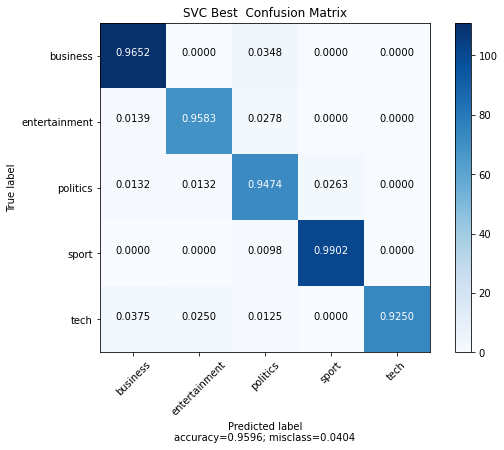

Model: {'selector__k': 2000, 'selector__score_func': <function chi2 at 0x7fc2d281c430>, 'softmax__C': 1, 'softmax__max_iter': 5000}
------------------------------ <REPORT> ------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.96      0.96      0.96        72
           2       0.90      0.93      0.92        76
           3       0.98      0.99      0.99       102
           4       1.00      0.93      0.96        80

    accuracy                           0.96       445
   macro avg       0.96      0.95      0.96       445
weighted avg       0.96      0.96      0.96       445



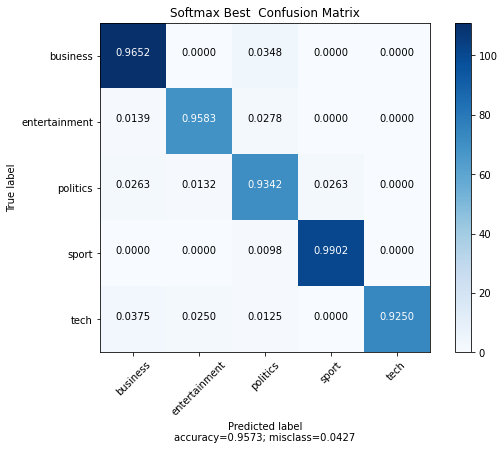

In [10]:
# evaluation report
ft.print_test_report("SVC Best ",pp.topic_list,svc_grid,X_test,y_test)
ft.print_test_report("Softmax Best ",pp.topic_list,softmax_grid,X_test,y_test)

4. Test with up-to-date samples

Model: {'SVC__C': 0.1, 'SVC__kernel': 'linear', 'selector__k': 2000, 'selector__score_func': <function chi2 at 0x7fc2d281c430>}
------------------------------ <REPORT> ------------------------------
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.80      1.00      0.89         4
           2       0.67      1.00      0.80         4
           3       1.00      0.75      0.86         4
           4       1.00      0.50      0.67         4

    accuracy                           0.80        20
   macro avg       0.84      0.80      0.79        20
weighted avg       0.84      0.80      0.79        20



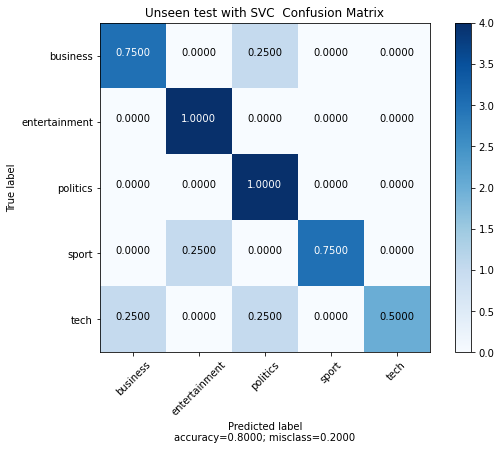

Model: {'selector__k': 2000, 'selector__score_func': <function chi2 at 0x7fc2d281c430>, 'softmax__C': 1, 'softmax__max_iter': 5000}
------------------------------ <REPORT> ------------------------------
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       1.00      1.00      1.00         4
           2       0.75      0.75      0.75         4
           3       1.00      1.00      1.00         4
           4       1.00      0.25      0.40         4

    accuracy                           0.75        20
   macro avg       0.84      0.75      0.74        20
weighted avg       0.84      0.75      0.74        20



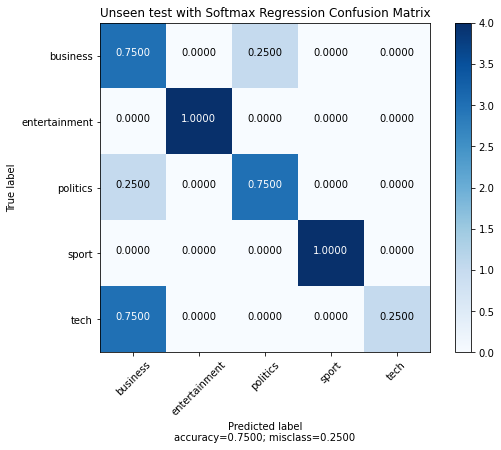

In [13]:
import numpy as np
import os
import os.path
import text_processing as tp

path = './unseen_dat/'

X_unseen_raw = []
y = []

for doc_name in os.listdir(path):
                doc_path = os.path.join(path, doc_name)
                if os.path.isfile(doc_path):
                    lines_set = utils.load_local_dataset(doc_path)
                    X_unseen_raw.append(lines_set)
                    y.append(int(doc_name.split('_')[0]))
title_voc = utils.load('vocab_title.pickle')
voc = utils.load('vocab.pickle')


X_unseen_vecs = []
for i,doc in enumerate(X_unseen_raw):
    title = np.asarray(tp.get_freq_vecs([doc[0]], title_voc)[0])
    content = np.asarray(tp.get_freq_vecs(doc[1:],  voc))
    content_vec =np.zeros(len(content[0]))
    for j in range(len(content)) :
        content_vec  = np.add(content_vec,content[j])
    pos = np.asarray(tp.get_pos_tag_list(doc))
    # vectorised general X
    x = np.concatenate((title,content_vec,pos), axis=0)
    #x = np.concatenate((x,pos),axis=0)
    X_unseen_vecs.append(x)

svm_test,soft_test = ft.get_grid_instance()
y_gold = np.asarray(y)
ft.print_test_report("Unseen test with SVC ",pp.topic_list,svm_test,X_unseen_vecs,y_gold)
ft.print_test_report("Unseen test with Softmax Regression",pp.topic_list,soft_test,X_unseen_vecs,np.asarray(y_gold))